In [0]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73199 sha256=46412a99c3e4d4d3a80f110cdb4c6b5efe15d07bce0e1abdd8ce5fbafcfdd87c
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15354 sha256=d9563679fc5e3b0c56d2e11abb9321e27932a1983d48f257319374e74da07ed0
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
import pandas as pd
import numpy as np
import seaborn as ans
import matplotlib.pyplot as plt
import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D,Activation
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


In [0]:
fashion_data=keras.datasets.fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
objects = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

3

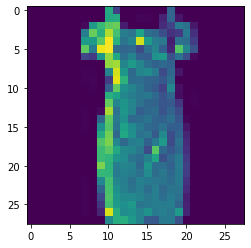

In [0]:
import random
i=random.randint(1,60000)
plt.imshow(x_train[i,0:].reshape(28,28))
label=y_train[i]
label

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

In [0]:
x_train[0].shape

(28, 28)

In [0]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [0]:
 from tensorflow.keras import regularizers
 l2_reg = regularizers.l2(0.01)

In [0]:
def build_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()
    
    model.add(Conv2D(hp.Int('input_units',
                                min_value=32,
                                max_value=256,
                                step=32), (5, 5),input_shape=x_train.shape[1:]))
    
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
        model.add(Conv2D(hp.Int('layer '+str(i),
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3)))
        model.add(Activation('relu'))
        model.add(Dropout(0.25))

    model.add(Flatten()) 
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [0]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [0]:
tuner_search=RandomSearch(build_model,
                          objective='val_acc',
                          executions_per_trial=1,
                          max_trials=3,directory='out',project_name="Mnist Fashio")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
tuner_search.search(x_train,y_train,epochs=7,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/7
48000/48000 [==============================] - 12s 255us/sample - loss: 0.4442 - acc: 0.8405 - val_loss: 0.3353 - val_acc: 0.8763
Epoch 2/7
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3133 - acc: 0.8880 - val_loss: 0.2816 - val_acc: 0.8986
Epoch 3/7
48000/48000 [==============================] - 6s 128us/sample - loss: 0.2739 - acc: 0.9009 - val_loss: 0.2674 - val_acc: 0.9030
Epoch 4/7
48000/48000 [==============================] - 6s 124us/sample - loss: 0.2463 - acc: 0.9089 - val_loss: 0.2631 - val_acc: 0.9029
Epoch 5/7
48000/48000 [==============================] - 6s 131us/sample - loss: 0.2269 - acc: 0.9153 - val_loss: 0.2494 - val_acc: 0.9076
Epoch 6/7
48000/48000 [==============================] - 6s 127us/sample - loss: 0.2115 - acc: 0.9217 - val_loss: 0.2537 - val_acc: 0.9050
Epoch 7/7
48000/48000 [==============================] - 6s 126us/sample - loss: 0.1954 - acc: 0.9273 - val_loss: 0

Train on 48000 samples, validate on 12000 samples
Epoch 1/7
48000/48000 [==============================] - 8s 162us/sample - loss: 0.6827 - acc: 0.7442 - val_loss: 0.4402 - val_acc: 0.8365
Epoch 2/7
48000/48000 [==============================] - 8s 156us/sample - loss: 0.4451 - acc: 0.8367 - val_loss: 0.3805 - val_acc: 0.8571
Epoch 3/7
48000/48000 [==============================] - 8s 157us/sample - loss: 0.3945 - acc: 0.8544 - val_loss: 0.3406 - val_acc: 0.8677
Epoch 4/7
48000/48000 [==============================] - 8s 158us/sample - loss: 0.3678 - acc: 0.8645 - val_loss: 0.3267 - val_acc: 0.8792
Epoch 5/7
48000/48000 [==============================] - 7s 151us/sample - loss: 0.3493 - acc: 0.8710 - val_loss: 0.3121 - val_acc: 0.8828
Epoch 6/7
48000/48000 [==============================] - 8s 163us/sample - loss: 0.3363 - acc: 0.8762 - val_loss: 0.2913 - val_acc: 0.8900
Epoch 7/7
48000/48000 [==============================] - 7s 148us/sample - loss: 0.3261 - acc: 0.8783 - val_loss: 0.

Train on 48000 samples, validate on 12000 samples
Epoch 1/7
48000/48000 [==============================] - 7s 146us/sample - loss: 0.4872 - acc: 0.8222 - val_loss: 0.3470 - val_acc: 0.8721
Epoch 2/7
48000/48000 [==============================] - 7s 141us/sample - loss: 0.3374 - acc: 0.8766 - val_loss: 0.3286 - val_acc: 0.8832
Epoch 3/7
48000/48000 [==============================] - 7s 138us/sample - loss: 0.2988 - acc: 0.8913 - val_loss: 0.2892 - val_acc: 0.8965
Epoch 4/7
48000/48000 [==============================] - 7s 140us/sample - loss: 0.2720 - acc: 0.8990 - val_loss: 0.2657 - val_acc: 0.9025
Epoch 5/7
48000/48000 [==============================] - 7s 141us/sample - loss: 0.2552 - acc: 0.9051 - val_loss: 0.2766 - val_acc: 0.8978
Epoch 6/7
48000/48000 [==============================] - 7s 142us/sample - loss: 0.2393 - acc: 0.9108 - val_loss: 0.2479 - val_acc: 0.9104
Epoch 7/7
48000/48000 [==============================] - 7s 141us/sample - loss: 0.2314 - acc: 0.9135 - val_loss: 0.

INFO:tensorflow:Oracle triggered exit


In [0]:
 model=tuner_search.get_best_models(num_models=1)[0]

In [0]:


tuner_search.get_best_hyperparameters()[0].values

{'input_units': 128,
 'layer 0': 64,
 'layer 1': 192,
 'layer 2': 32,
 'layer 3': 32,
 'n_layers': 2}

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 128)       3328      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0

In [0]:
training=model.fit(x_train, y_train, epochs=10,batch_size=128,validation_split=0.12, initial_epoch=0)

Train on 52800 samples, validate on 7200 samples
Epoch 1/10
52800/52800 [==============================] - 3s 66us/sample - loss: 0.1881 - acc: 0.9305 - val_loss: 0.2236 - val_acc: 0.9169
Epoch 2/10
52800/52800 [==============================] - 3s 61us/sample - loss: 0.1754 - acc: 0.9346 - val_loss: 0.2215 - val_acc: 0.9189
Epoch 3/10
52800/52800 [==============================] - 3s 61us/sample - loss: 0.1725 - acc: 0.9366 - val_loss: 0.2227 - val_acc: 0.9171
Epoch 4/10
52800/52800 [==============================] - 3s 60us/sample - loss: 0.1674 - acc: 0.9377 - val_loss: 0.2305 - val_acc: 0.9151
Epoch 5/10
52800/52800 [==============================] - 3s 62us/sample - loss: 0.1654 - acc: 0.9379 - val_loss: 0.2163 - val_acc: 0.9225
Epoch 6/10
52800/52800 [==============================] - 3s 60us/sample - loss: 0.1583 - acc: 0.9399 - val_loss: 0.2175 - val_acc: 0.9217
Epoch 7/10
52800/52800 [==============================] - 3s 58us/sample - loss: 0.1539 - acc: 0.9418 - val_loss: 0.2

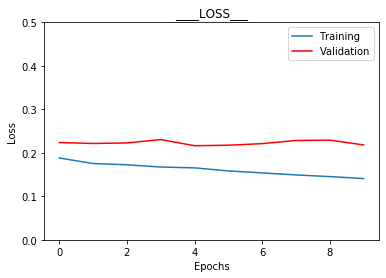

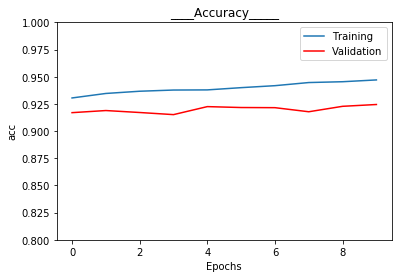

In [0]:
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('____LOSS___')
plt.legend(["Training", "Validation"])
plt.ylim(0,0.5)
plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.title('____Accuracy_____')
plt.legend(['Training', 'Validation'])
plt.ylim(0.8,1)
plt.show()

In [0]:
predicted_classes = model.predict_classes(x_test)


In [0]:
from sklearn.metrics import classification_report,accuracy_score
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.88      0.87      0.87      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.87      0.87      0.87      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.75      0.77      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.97      0.98      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [0]:

print(accuracy_score(y_test,predicted_classes))

0.9187


In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_classes)


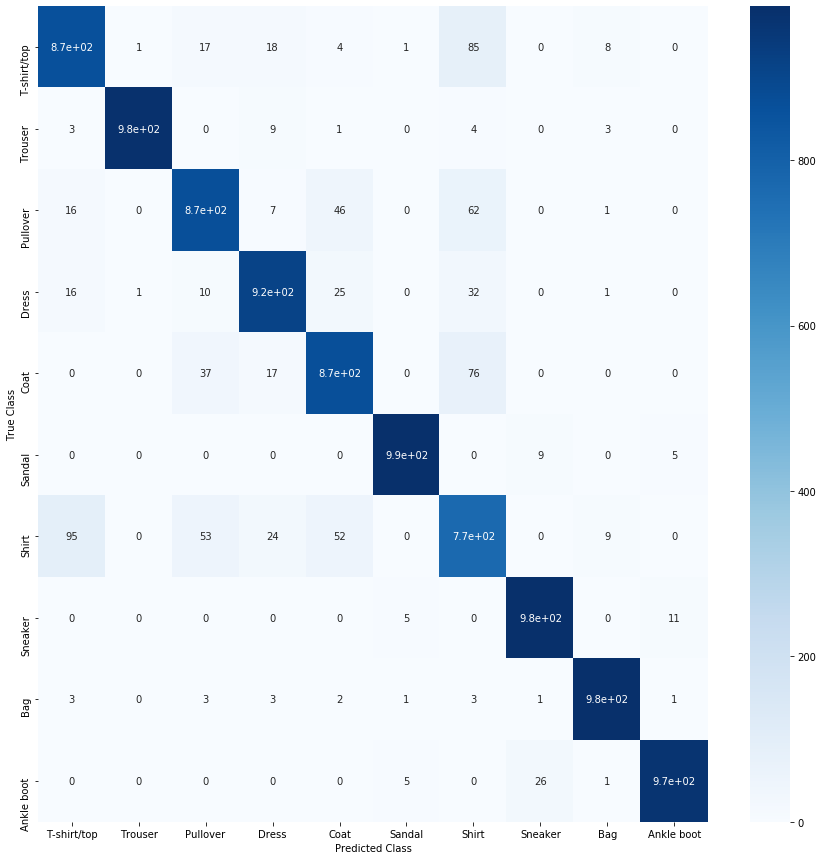

In [0]:

df_cm = pd.DataFrame(cm, index = [objects[i] for i in range(0,10)], columns = [objects[i] for i in range(0,10)])
plt.figure(figsize = (15,15))
ans.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()